# Importing the necessary libraries

In [12]:
import requests
import base64
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from sklearn.inspection import permutation_importance

In [2]:
df = pd.read_csv('Project_Database_NoOutliers_Encoded.csv')
df.head()
df = df.loc[:, ~df.columns.str.contains('^Unnamed', case=False)]
df = df.drop(['artist','song','release_date','1st_word','longest_word','anomaly','2nd_word','3rd_word','4th_word','5th_word','5th_word_percentage','4th_word_percentage','popularity','year','1st_occurence','2nd_occurence','3rd_occurence','4th_occurence','5th_occurence'],axis = 1)

## Training XGBoost model

In [ ]:
# Selecting Target and Features
X = df.drop('hit', axis=1)  
y = df['hit']  

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Training the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
model.get_booster().feature_names = X.columns.tolist()

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:26:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Plotting Feature Importance with XGBoost

### Gain

<Figure size 1000x800 with 0 Axes>

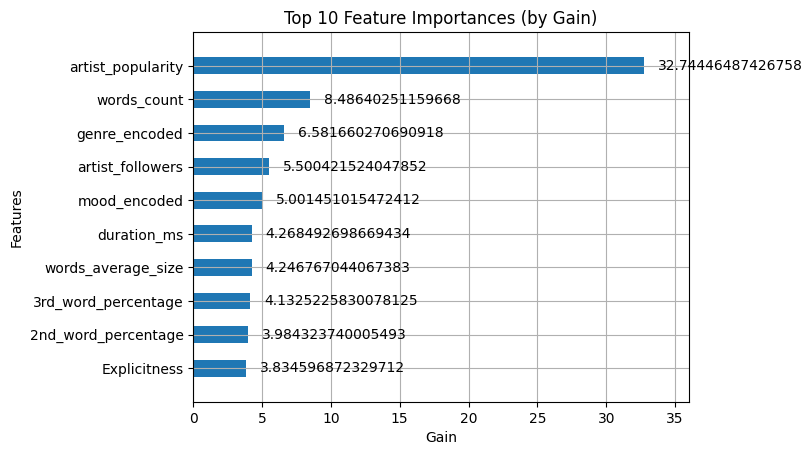

In [ ]:
plt.figure(figsize=(10, 8))
plot_importance(model, importance_type='gain', xlabel='Gain', height=0.5, max_num_features=10)
plt.title("Top 10 Feature Importances (by Gain)")
plt.show()

### Weight

<Figure size 1000x800 with 0 Axes>

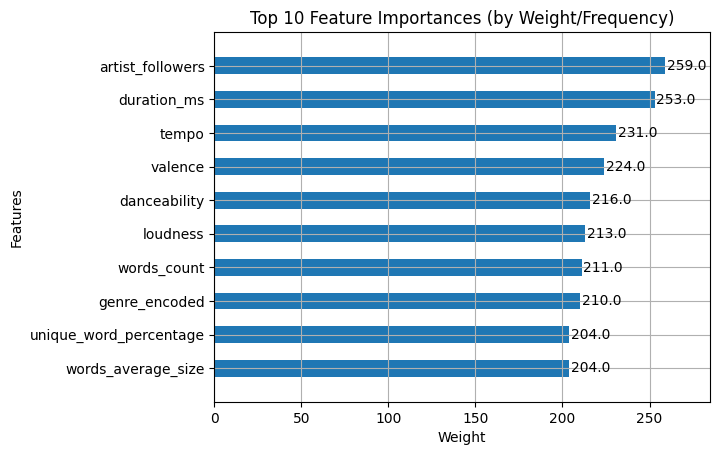

In [ ]:
plt.figure(figsize=(10, 8))
plot_importance(model, importance_type='weight', xlabel='Weight', height=0.5, max_num_features=10)
plt.title("Top 10 Feature Importances (by Weight/Frequency)")
plt.show()

### Cover

<Figure size 1000x800 with 0 Axes>

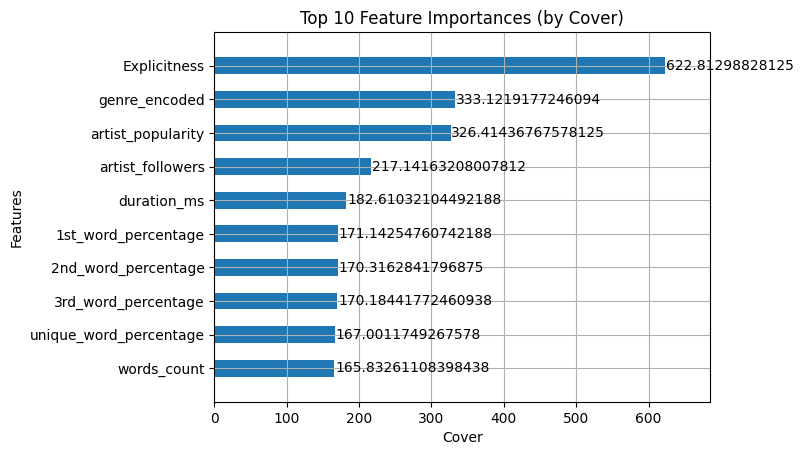

In [ ]:
plt.figure(figsize=(10, 8))
plot_importance(model, importance_type='cover', xlabel='Cover', height=0.5, max_num_features=10)
plt.title("Top 10 Feature Importances (by Cover)")
plt.show()

## Plotting Feature Importance with Permutation Importance

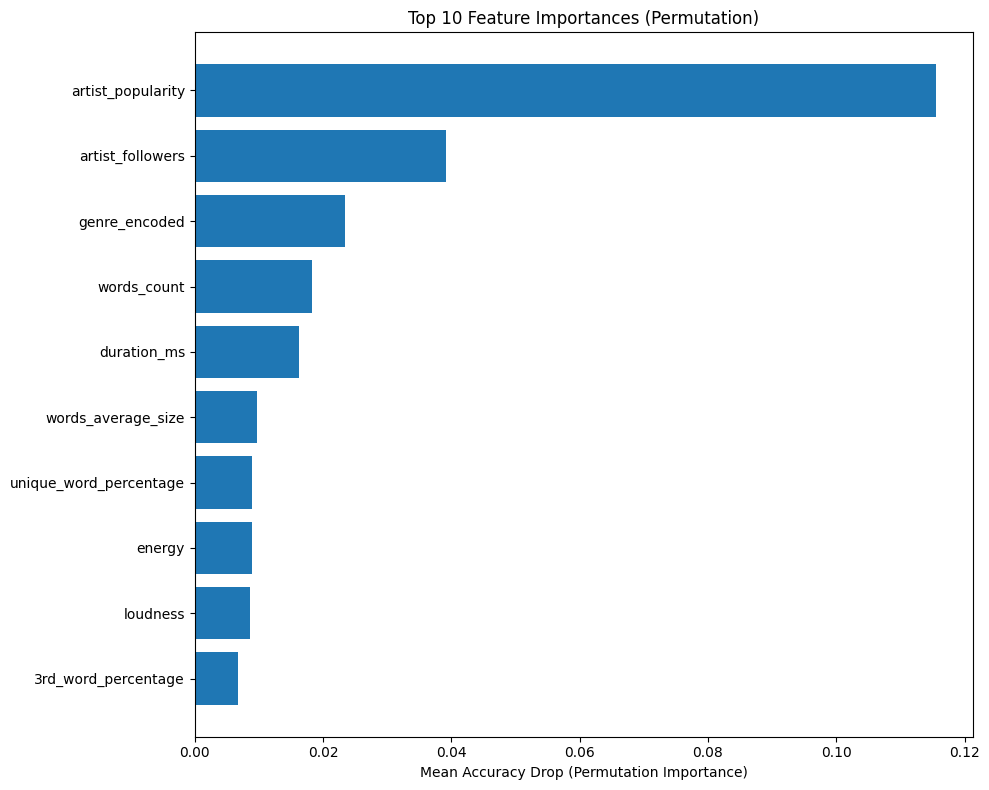

In [ ]:
# Permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Extracting and sorting the results
sorted_idx = result.importances_mean.argsort()[::-1]
top_n = 10 

plt.figure(figsize=(10, 8))
plt.barh(np.array(X.columns)[sorted_idx[:top_n]][::-1], 
         result.importances_mean[sorted_idx[:top_n]][::-1])
plt.xlabel("Mean Accuracy Drop (Permutation Importance)")
plt.title("Top 10 Feature Importances (Permutation)")
plt.tight_layout()
plt.show()